In [39]:
import pandas as pd
import numpy as np
df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [41]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
df.sample(5)

,v1,v2
5359,ham,This is ur face test ( 1 2 3 4 5 6 7 8 9 &lt;...
1881,ham,Ok.. ÃÃ finishing soon?
1800,ham,excellent. I spent &lt;#&gt; years in the Ai...
3366,ham,Hey what are you doing. Y no reply pa..
1843,ham,Super da:)good replacement for murali


In [42]:
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)

In [43]:
df.sample(5)

,message_type,message
3058,ham,"Dear all, as we know &lt;#&gt; th is the &lt..."
1890,ham,Ok but knackered. Just came home and went to s...
568,ham,Love it! Daddy will make you scream with pleas...
3321,ham,Ok darlin i supose it was ok i just worry too ...
1272,ham,Ok...


In [44]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

In [45]:
df['message_type']=encoder.fit_transform(df['message_type'])
df['message_type'].sample(5)

279     0
427     0
3668    0
2032    0
2914    0
Name: message_type, dtype: int32

In [46]:
df[df['message_type']==1]

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [47]:
df.isnull().sum()
df.duplicated().sum()

403

In [48]:
df=df.drop_duplicates()

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
df['message_type'].value_counts()

0    4516
1     653
Name: message_type, dtype: int64

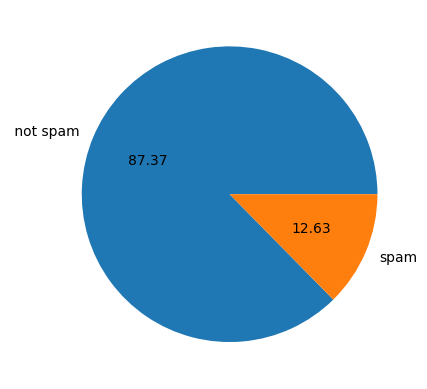

In [50]:
plt.pie(df['message_type'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

In [51]:
#natural language tool kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
df['num_characters']=df['message'].apply(len)
df.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [53]:
from nltk.tokenize import word_tokenize
df['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568    [Will, Ã_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [54]:
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words
4036,0,Dont flatter yourself... Tell that man of mine...,93,18
3404,0,"Jus chillaxin, what up",22,5
4997,0,Can you talk with me..,22,6
4899,1,"ou are guaranteed the latest Nokia Phone, a 40...",148,30
5541,0,Yeah it's jus rite...,21,6


In [55]:
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [56]:
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.590788,17.120903,1.799601
std,56.405390,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [57]:
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,138.742726,27.675345,2.975498
std,30.419480,7.011513,1.487993
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,226.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

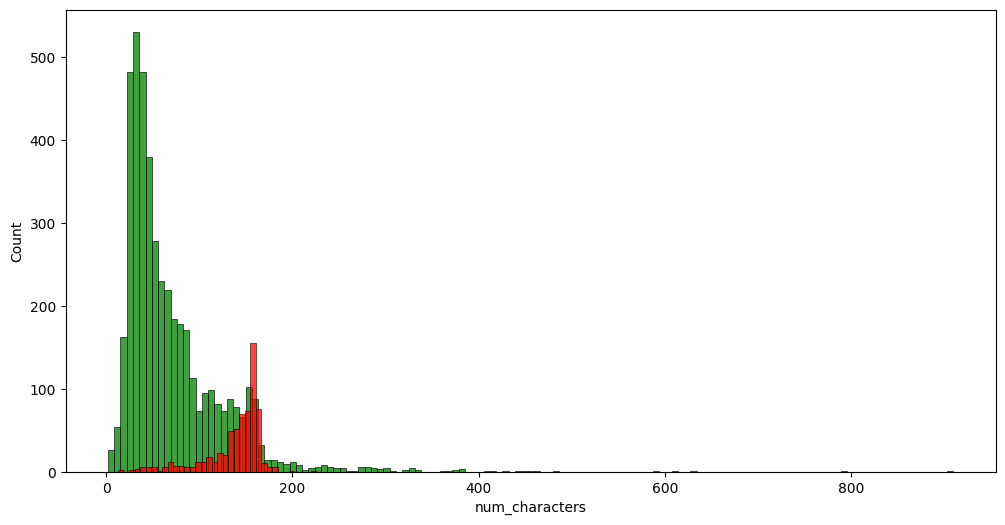

In [58]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_characters'],color='green')
sns.histplot(df[df['message_type']==1]['num_characters'],color = 'red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

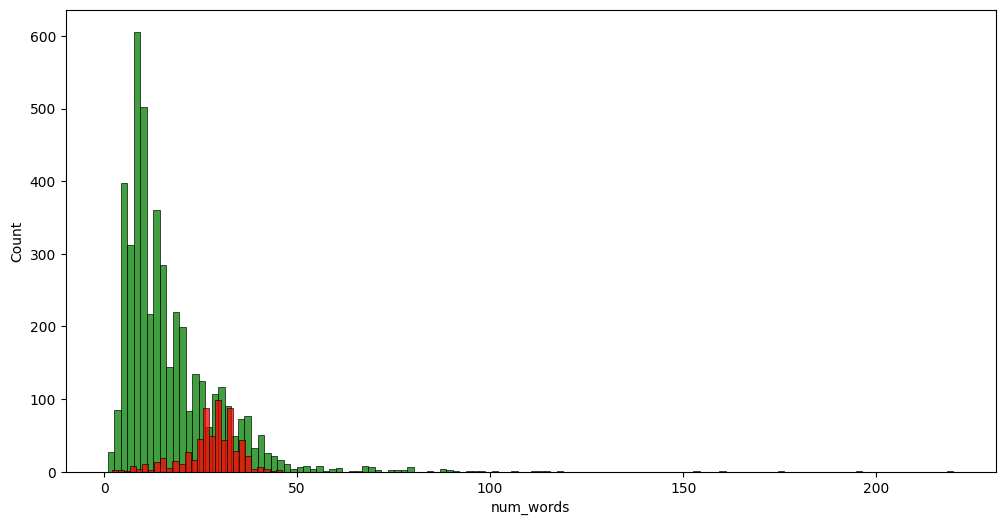

In [59]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'],color='green')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')

<AxesSubplot:>

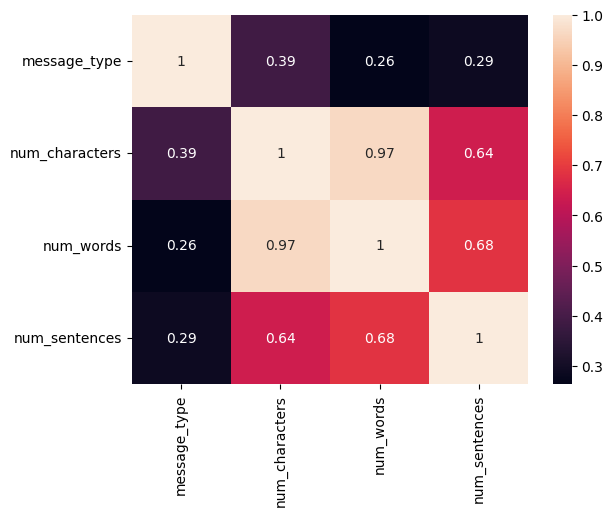

In [60]:
#plotting a heatmap for the correlation
sns.heatmap(df.corr(),annot=True)

In [61]:
def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)
    y=[] 
    for i in message:
        if i.isalnum():
            y.append(i)

        y.clear()
     #for checking punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()
    
    #now stemming function
    for i in message:
        y.append(ps.stem(i))
    
    #return y  --> returns as list
    return " ".join(y)
    
# Removing stop words and punctuations
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english')) 

#now for punctuation
import string
string.punctuation
# stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
df['transformed_msg']=df['message'].apply(text_transform)

In [63]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [64]:
spam_wc=wc.generate(df[df['message_type']==1]['transformed_msg'].str.cat(sep=""))

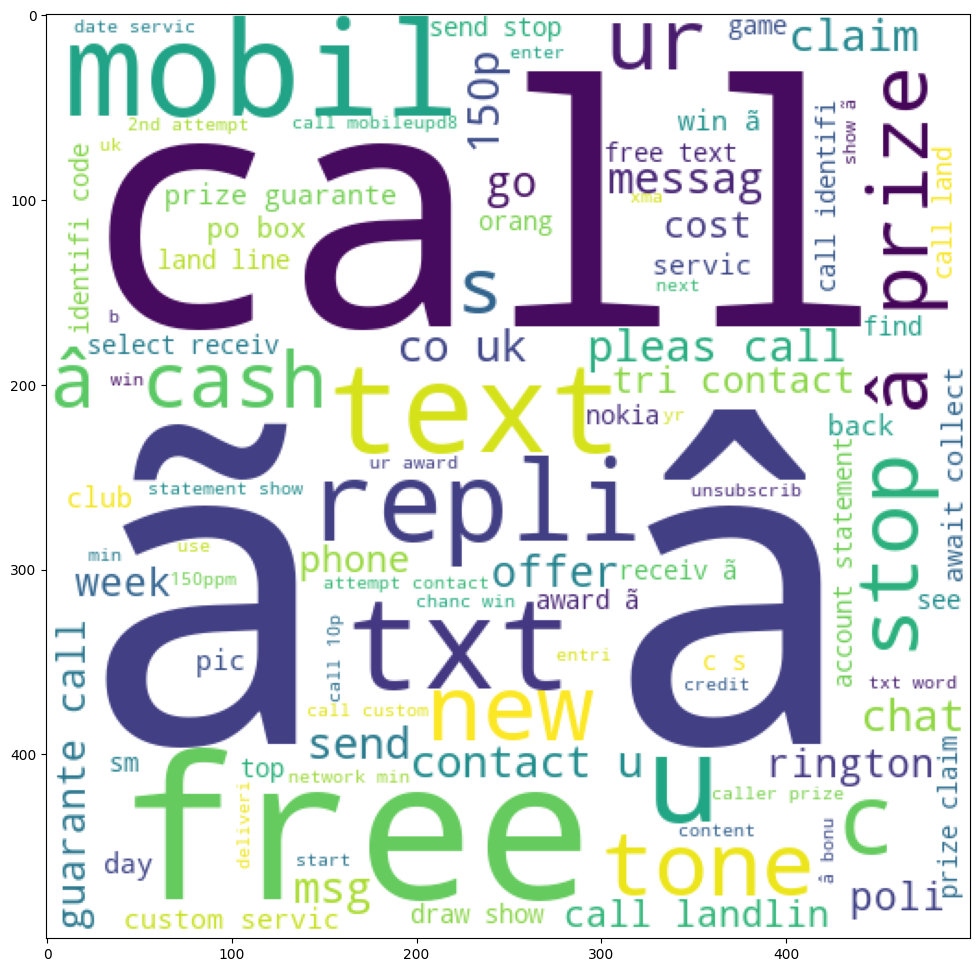

In [65]:
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

In [66]:
ham_wc=wc.generate(df[df['message_type']==0]['transformed_msg'].str.cat(sep=""))

In [67]:
plt.figure(figsize=(18,12))

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

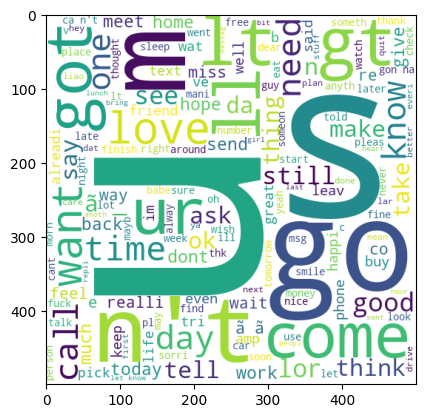

In [68]:
plt.imshow(ham_wc)

In [73]:
spam_corpus=[]
for msg in df[df['message_type']==1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
# from collections import Counter
# Counter(spam_corpus)
# Counter(spam_corpus).most_common(30)
# plt.figure(figsize=(18,12))
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000) 
X=tfidf.fit_transform(df['transformed_msg']).toarray()
y=df['message_type'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [76]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [77]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))

Accuracy score of Gaussian NB is:  0.8781431334622823
Confusion Matrix of Guassian NB is:  [[789 107]
 [ 19 119]]
Precision score of the Gaussian NB is 0.5265486725663717


In [78]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))

Accuracy score of Multinomial NB is:  0.9748549323017408
Confusion Matrix of Multinomial NB is:  [[896   0]
 [ 26 112]]
Precision score of the Multinomial NB is 1.0


In [79]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))

Accuracy score of Bernoulli NB is:  0.9864603481624759
Confusion Matrix of Bernoulli NB is:  [[896   0]
 [ 14 124]]
Precision score of the Bernoulli NB is 1.0


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))